**Credit Card Approval Prediction** <br>
*Selim Göktuğ Cankurtaran <br>


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

application_record = pd.read_csv('/content/application_record.csv')
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit_record = pd.read_csv('/content/credit_record.csv')
credit_record.head(7)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C


In [ ]:
application_record.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [ ]:
credit_record.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

![image.png](attachment:image.png)

In [ ]:
begin_month=pd.DataFrame(credit_record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
df=pd.merge(application_record,begin_month,how="left",on="ID")

In [ ]:
credit_record['dep_value'] = None
credit_record['dep_value'][credit_record['STATUS'] =='2']='Yes' 
credit_record['dep_value'][credit_record['STATUS'] =='3']='Yes' 
credit_record['dep_value'][credit_record['STATUS'] =='4']='Yes' 
credit_record['dep_value'][credit_record['STATUS'] =='5']='Yes'

'''
2: 60-89 days overdue --> 'Yes'
3: 90-119 days overdue --> 'Yes'
4: 120-149 days overdue --> 'Yes'
5: Overdue or bad debts, write-offs for more than 150 days --> 'Yes'
'''


"\n2: 60-89 days overdue --> 'Yes'\n3: 90-119 days overdue --> 'Yes'\n4: 120-149 days overdue --> 'Yes'\n5: Overdue or bad debts, write-offs for more than 150 days --> 'Yes'\n"

In [ ]:
credit_record

,ID,MONTHS_BALANCE,STATUS,dep_value
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None
...,...,...,...,...
1048570,5150487,-25,C,None
1048571,5150487,-26,C,None
1048572,5150487,-27,C,None
1048573,5150487,-28,C,None


In [ ]:
crcnt=credit_record.groupby('ID').count()
crcnt['dep_value'][crcnt['dep_value'] > 0]='Yes' 
crcnt['dep_value'][crcnt['dep_value'] == 0]='No' 
crcnt = crcnt[['dep_value']]
df=pd.merge(df,crcnt,how='inner',on='ID')
df['target'] = df['dep_value']
df.loc[df['target']=='Yes','target']=1 
df.loc[df['target']=='No','target']=0

'''
0: 1-29 days past due  --> 'No'
1: 30-59 days past due  --> 'No'
C: paid off that month --> 'Yes'
X: No loan for the month--> 'Yes'
df['dep_value'='Yes'] --> target = 1
df['dep_value'='No'] --> target = 0
'''

"\n0: 1-29 days past due  --> 'No'\n1: 30-59 days past due  --> 'No'\nC: paid off that month --> 'Yes'\nX: No loan for the month--> 'Yes'\ndf['dep_value'='Yes'] --> target = 1\ndf['dep_value'='No'] --> target = 0\n"

In [ ]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


In [ ]:
df['dep_value'].value_counts()

No     35841
Yes      616
Name: dep_value, dtype: int64

# GRAPHS

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
msno.matrix(application_record,figsize=(6,3), fontsize=10)
plt.show()

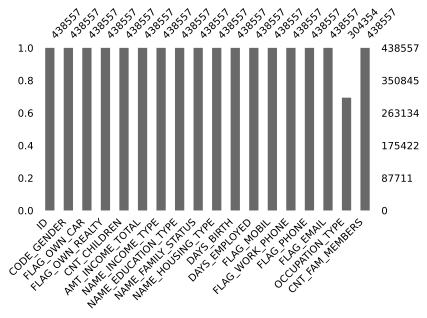

In [ ]:
msno.bar(application_record,figsize=(6,3), fontsize=10)
plt.show()

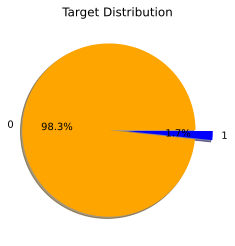

In [ ]:
import matplotlib.pyplot as plt
labels =df['target'].value_counts(sort = True).index
sizes = df['target'].value_counts(sort = True)
 
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=["orange","blue"], autopct='%1.1f%%', shadow=True, explode=[0.1,0.1])

plt.title('Target Distribution')
plt.show()

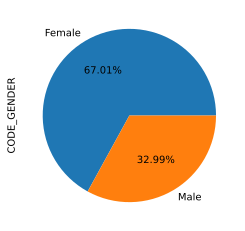

In [ ]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
df.groupby('CODE_GENDER')['CODE_GENDER'].count().plot(kind='pie',labels=['Female','Male'], autopct='%1.2f%%', y='CODE_GENDER')

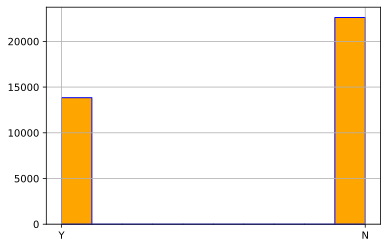

In [ ]:
df['FLAG_OWN_CAR'].hist(color = "orange", ec="blue")

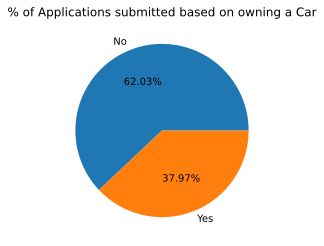

In [ ]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
plt.pie(df['FLAG_OWN_CAR'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

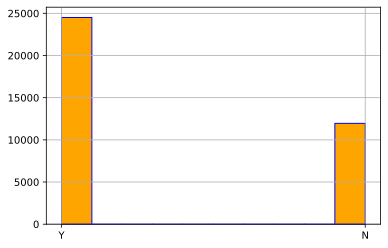

In [ ]:
df['FLAG_OWN_REALTY'].hist(color = "orange", ec="blue")

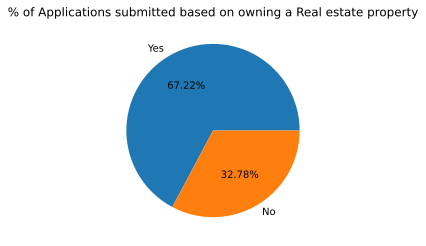

In [ ]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
plt.pie(df['FLAG_OWN_REALTY'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

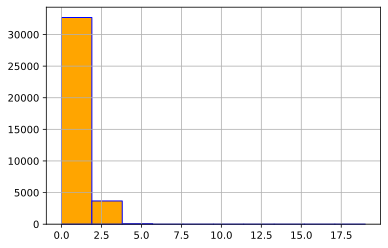

In [ ]:
df['CNT_CHILDREN'].hist(color = "orange", ec="blue")

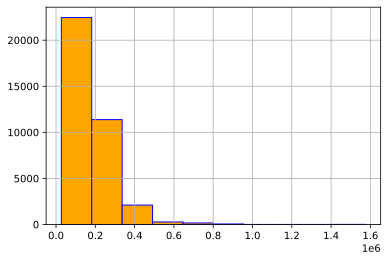

In [ ]:
df['AMT_INCOME_TOTAL'].hist(color = "orange", ec="blue")

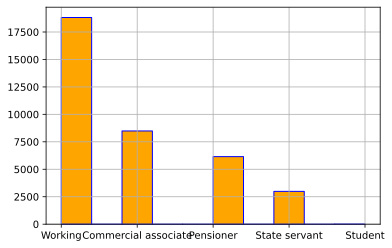

In [ ]:
df['NAME_INCOME_TYPE'].hist(color = "orange", ec="blue")

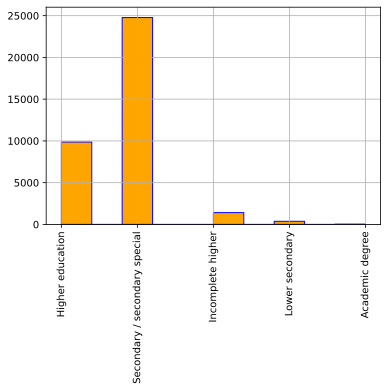

In [ ]:
df['NAME_EDUCATION_TYPE'].hist(xrot=90, color = "orange", ec="blue")

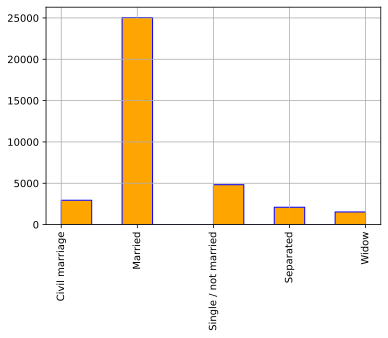

In [ ]:
df['NAME_FAMILY_STATUS'].hist(xrot=90, color = "orange", ec="blue")

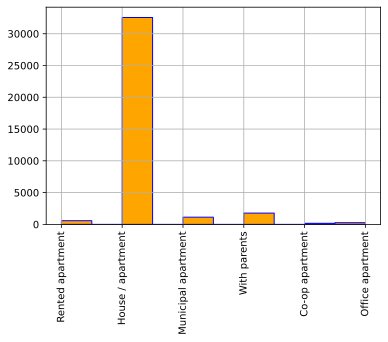

In [ ]:
df['NAME_HOUSING_TYPE'].hist(xrot=90, color = "orange", ec="blue")

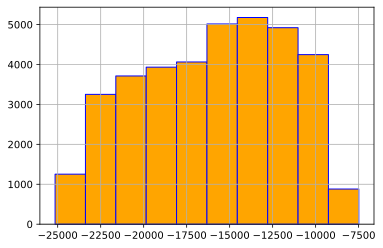

In [ ]:
df['DAYS_BIRTH'].hist(color = "orange", ec="blue")

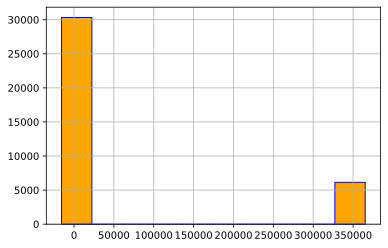

In [ ]:
df['DAYS_EMPLOYED'].hist(color = "orange", ec="blue")

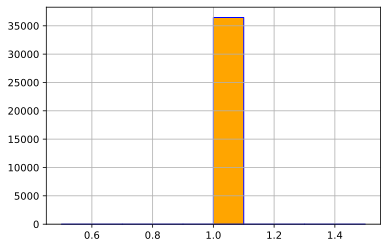

In [ ]:
df['FLAG_MOBIL'].hist(color = "orange", ec="blue")

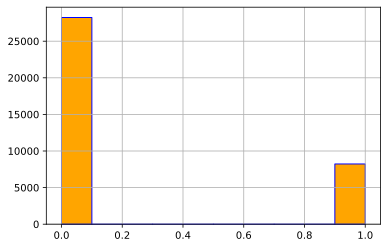

In [ ]:
df['FLAG_WORK_PHONE'].hist(color = "orange", ec="blue")

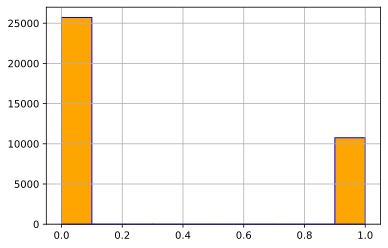

In [ ]:
df['FLAG_PHONE'].hist(color = "orange", ec="blue")

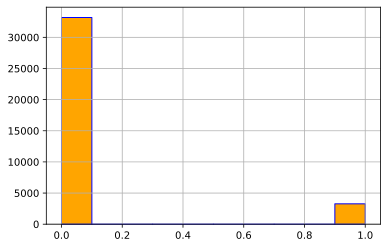

In [ ]:
df['FLAG_EMAIL'].hist(color = "orange", ec="blue")

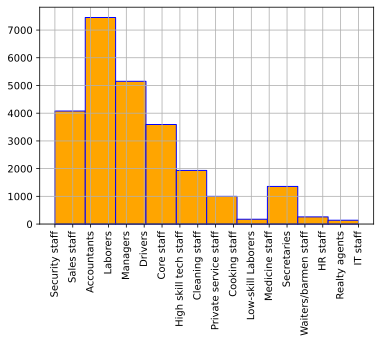

In [ ]:
df['OCCUPATION_TYPE'].hist(xrot=90, color = "orange", ec="blue")

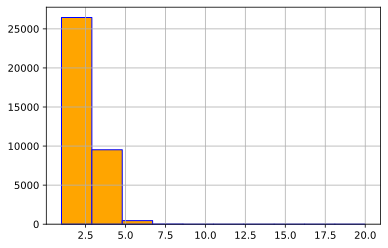

In [ ]:
df['CNT_FAM_MEMBERS'].hist(color = "orange", ec="blue")

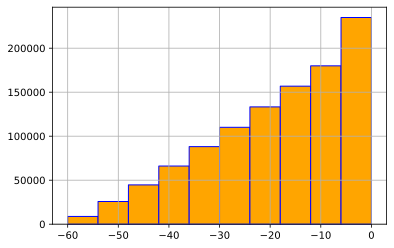

In [ ]:
credit_record['MONTHS_BALANCE'].hist(color = "orange", ec="blue")

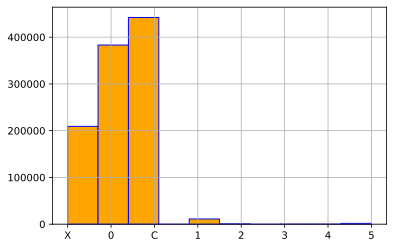

In [ ]:
credit_record['STATUS'].hist(color = "orange", ec="blue")

# Features

In [ ]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []
    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)
                temp_df_1=df.loc[df['OCCUPATION_TYPE'] == occupation]
                temp_df_2=temp_df_1.loc[temp_df_1['CODE_GENDER'] == gender]
                temp_df_3=temp_df_2.loc[temp_df_2['NAME_EDUCATION_TYPE'] == education]
                length_filter = len(temp_df_3)
                Percentage.append(length_filter/length)
    percent_dict={
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }
    df1 = pd.DataFrame(percent_dict)
    return df1

In [ ]:
occupation_popularity = occupation_by_education_by_gender(list(df['OCCUPATION_TYPE'].unique()), 
                                                          list(df['NAME_EDUCATION_TYPE'].unique()), 
                                                          list(df['CODE_GENDER'].unique()), 
                                                          len(df))

In [ ]:
occupation_popularity

,Gender,Education,Occupation,Popularity Percentage
0,M,Higher education,NaN,0.000000
1,M,Higher education,Security staff,0.001673
2,M,Higher education,Sales staff,0.004526
3,M,Higher education,Accountants,0.000933
4,M,Higher education,Laborers,0.014620
...,...,...,...,...
185,F,Academic degree,Secretaries,0.000000
186,F,Academic degree,Waiters/barmen staff,0.000000
187,F,Academic degree,HR staff,0.000000
188,F,Academic degree,Realty agents,0.000000


In [ ]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

In [ ]:
def Dict(data):
    tag_list=list(data['Tag'].unique())
    popular_occupation = []
    data_grouped = data.groupby('Tag')
    for tag in tag_list:
        grouped_data = data_grouped.get_group(tag)
        popular_occupation.append(grouped_data.loc[grouped_data['Popularity Percentage'] == max(list(grouped_data['Popularity Percentage']))]['Occupation'].tolist()[0])
    Tag_dict={
        'Tag': tag_list,
        'Occupation': popular_occupation
    }
    return Tag_dict

In [ ]:
dict_df = Dict(occupation_popularity)

In [ ]:
dict_df

{'Occupation': ['Managers',
  'Laborers',
  'Laborers',
  'Laborers',
  'Managers',
  'Core staff',
  'Sales staff',
  'Core staff',
  'Laborers',
  'Sales staff'],
 'Tag': ['M_Higher education',
  'M_Secondary / secondary special',
  'M_Incomplete higher',
  'M_Lower secondary',
  'M_Academic degree',
  'F_Higher education',
  'F_Secondary / secondary special',
  'F_Incomplete higher',
  'F_Lower secondary',
  'F_Academic degree']}

In [ ]:
tag_data = pd.DataFrame(dict_df)

In [ ]:
tag_data

,Tag,Occupation
0,M_Higher education,Managers
1,M_Secondary / secondary special,Laborers
2,M_Incomplete higher,Laborers
3,M_Lower secondary,Laborers
4,M_Academic degree,Managers
5,F_Higher education,Core staff
6,F_Secondary / secondary special,Sales staff
7,F_Incomplete higher,Core staff
8,F_Lower secondary,Laborers
9,F_Academic degree,Sales staff


In [ ]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]
    
'''
tag_data, tag_dict e dönüştürüldü (pandas.df --> Dictionary)
'''

'\ntag_data, tag_dict e dönüştürüldü (pandas.df --> Dictionary)\n'

In [ ]:
tag_dict

{'F_Academic degree': 'Sales staff',
 'F_Higher education': 'Core staff',
 'F_Incomplete higher': 'Core staff',
 'F_Lower secondary': 'Laborers',
 'F_Secondary / secondary special': 'Sales staff',
 'M_Academic degree': 'Managers',
 'M_Higher education': 'Managers',
 'M_Incomplete higher': 'Laborers',
 'M_Lower secondary': 'Laborers',
 'M_Secondary / secondary special': 'Laborers'}

In [ ]:
df['Tag'] = df['CODE_GENDER']+ '_' + df['NAME_EDUCATION_TYPE']

In [ ]:
def Replace_NaN(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df

In [ ]:
df = df.apply(Replace_NaN, axis=1)

In [ ]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
begin_month            0
dep_value              0
target                 0
Tag                    0
dtype: int64

In [ ]:
import numpy as np
df['AGE'] = np.ceil(pd.to_timedelta(df['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [ ]:
df.drop('DAYS_BIRTH', axis=1, inplace=True)

In [ ]:
df.loc[(df['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
df['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(df['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)

In [ ]:
df.drop(['DAYS_EMPLOYED', 'Tag'], axis=1, inplace=True)

In [ ]:
categorical_features = ['CODE_GENDER', 
                        'FLAG_OWN_CAR', 
                        'FLAG_OWN_REALTY', 
                        'NAME_INCOME_TYPE', 
                        'NAME_FAMILY_STATUS', 
                        'OCCUPATION_TYPE', 
                        'NAME_HOUSING_TYPE', 
                        'NAME_EDUCATION_TYPE']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe.fit(df[categorical_features])

OrdinalEncoder()

In [ ]:
df[categorical_features] = oe.transform(df[categorical_features])

In [ ]:
df.drop(['ID', 'dep_value'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  float64
 1   FLAG_OWN_CAR         36457 non-null  float64
 2   FLAG_OWN_REALTY      36457 non-null  float64
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  float64
 6   NAME_EDUCATION_TYPE  36457 non-null  float64
 7   NAME_FAMILY_STATUS   36457 non-null  float64
 8   NAME_HOUSING_TYPE    36457 non-null  float64
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  OCCUPATION_TYPE      36457 non-null  float64
 14  CNT_FAM_MEMBERS      36457 non-null  float64
 15  begin_month          36457 non-null 

In [ ]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target,AGE,YEARS_EMPLOYED
0,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,1,1,0,0,10.0,2.0,-15.0,0,33.0,13.0
1,1.0,1.0,1.0,0,427500.0,4.0,1.0,0.0,4.0,1,1,0,0,10.0,2.0,-14.0,0,33.0,13.0
2,1.0,1.0,1.0,0,112500.0,4.0,4.0,1.0,1.0,1,0,0,0,16.0,2.0,-29.0,0,59.0,4.0
3,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,1,0,1,1,14.0,1.0,-4.0,0,53.0,9.0
4,0.0,0.0,1.0,0,270000.0,0.0,4.0,3.0,1.0,1,0,1,1,14.0,1.0,-26.0,0,53.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.0,1.0,1.0,0,315000.0,4.0,4.0,1.0,1.0,1,0,0,0,10.0,2.0,-11.0,1,48.0,7.0
36453,0.0,0.0,1.0,0,157500.0,0.0,1.0,1.0,1.0,1,0,1,1,11.0,2.0,-23.0,1,34.0,4.0
36454,0.0,0.0,1.0,0,157500.0,1.0,1.0,1.0,1.0,1,0,1,1,11.0,2.0,-32.0,1,34.0,4.0
36455,0.0,0.0,1.0,0,283500.0,4.0,4.0,1.0,1.0,1,0,0,0,14.0,2.0,-9.0,1,50.0,2.0


# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Power Transformer

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)

X_train = pt.transform(X_train)
X_test = pt.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.703162,1.276188,0.698872,-0.667260,-0.092412,0.918285,0.681935,-0.232852,-0.228439,0.0,1.853168,-0.648387,-0.313151,-1.232233,-0.072836,0.774218,-0.570870,1.351633
1,-0.703162,-0.783583,0.698872,-0.667260,1.177967,0.918285,-1.523627,1.563125,-0.228439,0.0,-0.539617,-0.648387,-0.313151,-1.232233,-1.610978,-0.819590,-0.110470,-0.969773
2,-0.703162,1.276188,-1.430877,1.635786,-1.286311,-0.176750,-1.523627,-0.232852,-0.228439,0.0,1.853168,-0.648387,-0.313151,-1.232233,1.723484,-0.259022,-1.393098,0.446713
3,1.422148,-0.783583,0.698872,1.635786,2.813831,-0.176750,0.681935,-0.232852,-0.228439,0.0,-0.539617,1.542290,-0.313151,-0.992918,1.723484,1.534989,-0.382459,1.560691
4,-0.703162,-0.783583,-1.430877,1.417802,-1.286311,0.918285,0.681935,-0.232852,2.781791,0.0,-0.539617,-0.648387,-0.313151,1.169970,0.957471,0.149272,-1.505057,-0.298775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25514,-0.703162,-0.783583,-1.430877,1.635786,-0.416900,-1.408731,0.681935,-0.232852,-0.228439,0.0,1.853168,1.542290,-0.313151,-0.089452,1.723484,1.115095,-0.765521,1.108550
25515,-0.703162,-0.783583,-1.430877,-0.667260,-1.286311,0.918285,0.681935,1.563125,2.781791,0.0,-0.539617,-0.648387,-0.313151,-0.089452,-1.610978,-1.723251,-1.505057,0.703894
25516,1.422148,1.276188,0.698872,-0.667260,0.604514,0.918285,0.681935,-0.232852,-0.228439,0.0,1.853168,-0.648387,-0.313151,-0.992918,-0.072836,0.937654,-1.070472,-0.585862
25517,1.422148,1.276188,-1.430877,-0.667260,-0.347601,0.918285,0.681935,-0.232852,-0.228439,0.0,1.853168,1.542290,-0.313151,-0.992918,-0.072836,-0.472399,0.641064,1.801446


# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ML

## Plot Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree

0.9612360577802158
Roc 0.60816
F1: 0.16863
[[0.97377476 0.02622524]
 [0.76756757 0.23243243]]


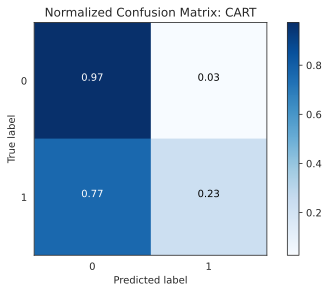

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import itertools

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_smote, y_train_smote)
y_pred = DT_model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print('Roc {:.5}'.format(roc_auc_score(y_test, DT_model.predict_proba(X_test)[:, 1])))
print('F1: {:.5}'.format(f1_score(y_test, y_pred)))
sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: CART')

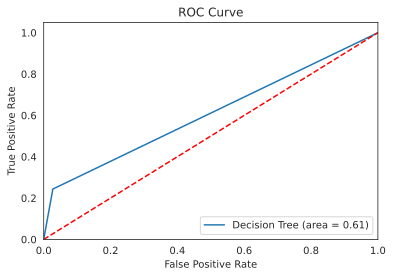

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dectree_roc_auc = roc_auc_score(y_test, DT_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, DT_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dectree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Dec_ROC')
plt.show()

## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
param_distributions = {"n_estimators": [750,1000,1250], "max_depth": [9,10,12,15], "min_samples_leaf":[5,8,10,14,16]}
grid_search_cv = GridSearchCV(model, param_distributions, verbose=2, cv=3)
grid_search_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ..max_depth=9, min_samples_leaf=5, n_estimators=750; total time=  26.8s
[CV] END ..max_depth=9, min_samples_leaf=5, n_estimators=750; total time=  26.2s
[CV] END ..max_depth=9, min_samples_leaf=5, n_estimators=750; total time=  26.4s
[CV] END .max_depth=9, min_samples_leaf=5, n_estimators=1000; total time=  35.5s
[CV] END .max_depth=9, min_samples_leaf=5, n_estimators=1000; total time=  35.4s
[CV] END .max_depth=9, min_samples_leaf=5, n_estimators=1000; total time=  35.0s
[CV] END .max_depth=9, min_samples_leaf=5, n_estimators=1250; total time=  44.3s
[CV] END .max_depth=9, min_samples_leaf=5, n_estimators=1250; total time=  44.6s
[CV] END .max_depth=9, min_samples_leaf=5, n_estimators=1250; total time=  44.6s
[CV] END ..max_depth=9, min_samples_leaf=8, n_estimators=750; total time=  31.9s
[CV] END ..max_depth=9, min_samples_leaf=8, n_estimators=750; total time=  27.7s
[CV] END ..max_depth=9, min_samples_leaf=8, n_e

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 12, 15],
                         'min_samples_leaf': [5, 8, 10, 14, 16],
                         'n_estimators': [750, 1000, 1250]},
             verbose=2)

In [ ]:
grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=1000)

Roc 0.69666
Accuracy Score is 0.95474
F1: 0.13613
[[10404   349]
 [  146    39]]
Normalized Confusion Matrix
[[0.96754394 0.03245606]
 [0.78918919 0.21081081]]


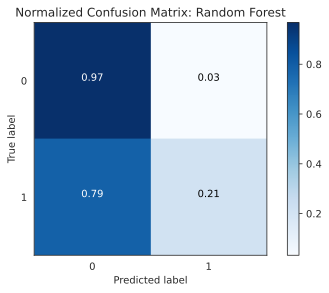

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=1000,
                              max_depth=15,
                              min_samples_leaf=5,
                              random_state = 42  
                              )
RF_model.fit(X_train_smote, y_train_smote)
y_predict = RF_model.predict(X_test)

print('Roc {:.5}'.format(roc_auc_score(y_test, RF_model.predict_proba(X_test)[:, 1])))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print(confusion_matrix(y_test, y_predict))
print('Normalized Confusion Matrix')
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forest')

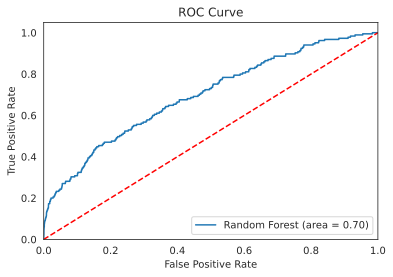

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rforest_roc_auc = roc_auc_score(y_test, RF_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rforest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('rforest_ROC')
plt.show()

## Logistic Regression

Accuracy Score is 0.61474
[[6631 4122]
 [  92   93]]
F1: 0.042273
0.5949246093484911
[[0.61666512 0.38333488]
 [0.4972973  0.5027027 ]]


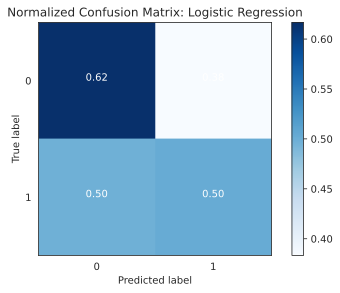

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
LR_model.fit(X_train_smote, y_train_smote)
y_predict = LR_model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(confusion_matrix(y_test, y_predict))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print(roc_auc_score(y_test, LR_model.predict_proba(X_test)[:, 1]))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

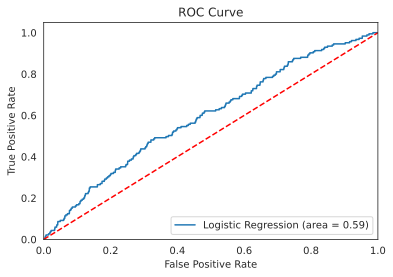

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LR_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, LR_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## SVM

Accuracy Score is 0.88718
[[9641 1112]
 [ 122   63]]
F1: 0.092647
0.6745868531974735
[[0.896587   0.103413  ]
 [0.65945946 0.34054054]]


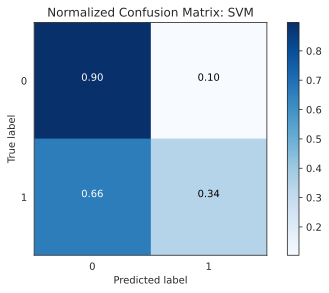

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
SVM_model = svm.SVC (
                 class_weight='balanced',
                 probability=True)
SVM_model.fit(X_train_smote, y_train_smote)
y_predict = SVM_model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(confusion_matrix(y_test, y_predict))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print(roc_auc_score(y_test, SVM_model.predict_proba(X_test)[:, 1]))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

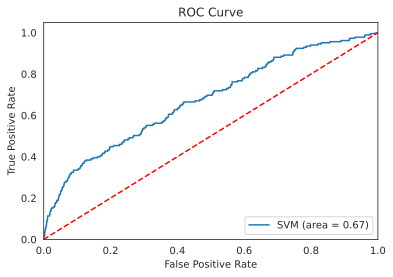

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, SVM_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, SVM_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## LGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()
param_distributions = {"n_estimators": [3250,3500,3750], "max_depth": [34,36,38,40,42,44], "scale_pos_weight":[52,56,60,64]}
grid_search_cv = GridSearchCV(lgbm, param_distributions,verbose=2, cv=3)
grid_search_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=52; total time=  21.6s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=52; total time=  26.9s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=52; total time=  27.6s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=56; total time=  20.1s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=56; total time=  27.0s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=56; total time=  27.8s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=60; total time=  19.9s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=60; total time=  27.0s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=60; total time=  29.4s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=64; total time=  20.4s
[CV] END max_depth=34, n_estimators=3250, scale_pos_weight=64; total time=  27.2s
[CV] END max_depth=34, n_estimators=

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'max_depth': [34, 36, 38, 40, 42, 44],
                         'n_estimators': [3250, 3500, 3750],
                         'scale_pos_weight': [52, 56, 60, 64]},
             verbose=2)

In [ ]:
grid_search_cv.best_estimator_

LGBMClassifier(max_depth=34, n_estimators=3250, scale_pos_weight=60)

Accuracy Score is 0.98044
       0   1
0  10677  76
1    138  47
F1: 0.30519
roc-auc score:  0.7156230442290147
[[0.9929322  0.0070678 ]
 [0.74594595 0.25405405]]


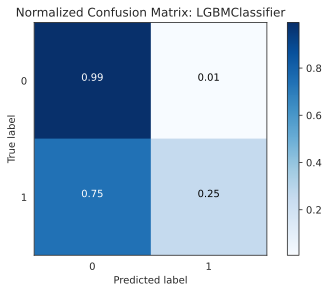

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
params={
         'max_depth':34,
         'n_estimators':3250,
         'scale_pos_weight':60,
         'seed':42
       }

lgbm = LGBMClassifier(**params)

lgbm.fit(X_train_smote, y_train_smote)
y_predict = lgbm.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print('roc-auc score: ', roc_auc_score(y_test, lgbm.predict_proba(X_test)[:, 1]))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LGBMClassifier')

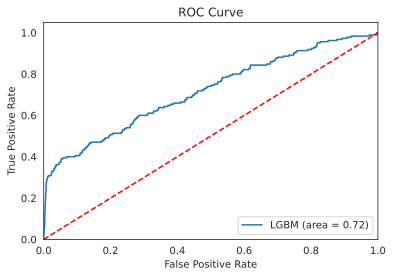

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lgbm_roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lgbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('lgbm_ROC')
plt.show()

## XGBoost

Accuracy Score is 0.9819
       0   1
0  10713  40
1    158  27
F1: 0.21429
roc-auc score:  0.7242888848115296
[[0.99628011 0.00371989]
 [0.85405405 0.14594595]]


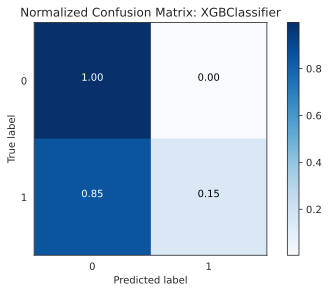

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=8,
                      n_estimators=2000,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

xgb.fit(X_train_smote, y_train_smote)
y_predict = xgb.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print('roc-auc score: ', roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: XGBClassifier')

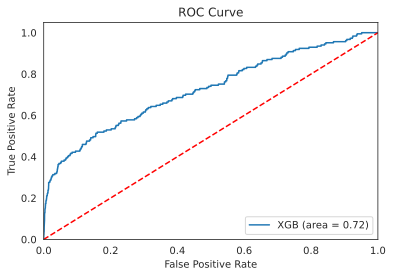

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xgb_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

# Appendix

## PCA Attempts

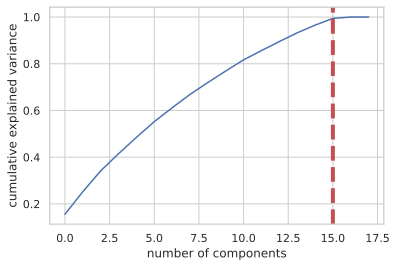

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.155596,1.555961e-01
1,0.252190,9.659356e-02
2,0.341519,8.932948e-02
3,0.414879,7.336036e-02
4,0.484804,6.992494e-02
5,0.552122,6.731773e-02
6,0.611565,5.944327e-02
7,0.668654,5.708897e-02
8,0.719844,5.118917e-02
9,0.768999,4.915503e-02


In [ ]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=18)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(18))

In [ ]:
pca = PCA(n_components=15)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))

columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'
           ,'OCCUPATION_TYPE','CNT_FAM_MEMBERS','begin_month','AGE','YEARS_EMPLOYED']
pca_test_df = pd.DataFrame(pca_test.components_, columns=columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
CODE_GENDER,-0.236786,2.035388e-01,-1.889797e-01,-0.540785,0.123628,-0.086012,0.126133,3.626120e-02,4.844383e-02,-1.838963e-01
FLAG_OWN_CAR,-0.252004,1.911885e-01,-2.807597e-01,-0.376247,0.239124,-0.042558,0.048268,-7.294906e-04,6.474887e-02,-2.196738e-01
FLAG_OWN_REALTY,0.097440,-1.186559e-01,-3.692383e-01,0.164990,0.030925,0.400185,0.306925,9.320269e-02,-5.166670e-02,-5.854774e-02
CNT_CHILDREN,-0.421676,-3.207047e-01,-6.012690e-02,0.144517,-0.113610,-0.020268,0.034793,-4.132992e-02,-4.802984e-01,-1.090069e-01
AMT_INCOME_TOTAL,-0.168629,3.384938e-01,-3.539044e-01,-0.025700,0.188189,-0.017687,-0.016209,7.957797e-02,-2.318201e-01,5.911317e-01
NAME_INCOME_TYPE,-0.190327,6.036675e-02,2.859207e-01,-0.208881,-0.262401,0.493444,0.125054,8.078608e-02,1.423360e-01,-1.006090e-01
NAME_EDUCATION_TYPE,0.160421,-3.355969e-01,1.719058e-01,-0.491270,-0.064554,0.145914,0.051130,2.753262e-01,-2.500786e-02,9.559626e-02
NAME_FAMILY_STATUS,0.271464,3.849982e-01,2.691107e-02,-0.007285,-0.256041,0.095902,0.090415,-1.983151e-02,-6.238553e-01,-2.346132e-01
NAME_HOUSING_TYPE,-0.070551,8.674429e-02,1.318293e-01,-0.109954,-0.405762,-0.497178,-0.300182,1.442454e-01,5.628367e-02,1.540711e-01
FLAG_MOBIL,-0.000000,1.734723e-18,-6.938894e-18,-0.000000,0.000000,0.000000,0.000000,-9.714451e-17,1.249001e-16,-1.387779e-16


In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

### Decision Tree

0.9367343207167672
Roc 0.59846
F1: 0.11509
[[0.94866549 0.05133451]
 [0.75675676 0.24324324]]


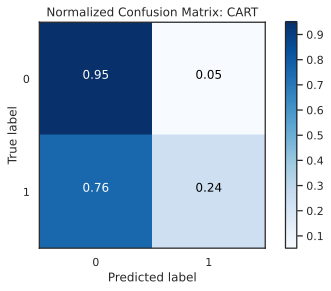

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_smote, y_train_smote)
y_pred = DT_model.predict(X_test_pca)

print(accuracy_score(y_test, y_pred))
print('Roc {:.5}'.format(roc_auc_score(y_test, DT_model.predict_proba(X_test_pca)[:, 1])))
print('F1: {:.5}'.format(f1_score(y_test, y_pred)))
sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_pred),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: CART')

### Random Forest

Roc 0.70376
Accuracy Score is 0.90327
F1: 0.10642
[[9817  936]
 [ 122   63]]
Normalized Confusion Matrix
[[0.91295452 0.08704548]
 [0.65945946 0.34054054]]


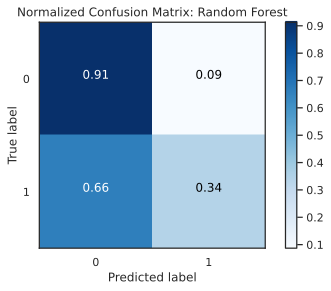

In [ ]:
RF_model = RandomForestClassifier(n_estimators=1000,
                              max_depth=15,
                              min_samples_leaf=5,
                              random_state = 42  
                              )
RF_model.fit(X_train_smote, y_train_smote)
y_predict = RF_model.predict(X_test_pca)

print('Roc {:.5}'.format(roc_auc_score(y_test, RF_model.predict_proba(X_test_pca)[:, 1])))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print(confusion_matrix(y_test, y_predict))
print('Normalized Confusion Matrix')
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Random Forest')


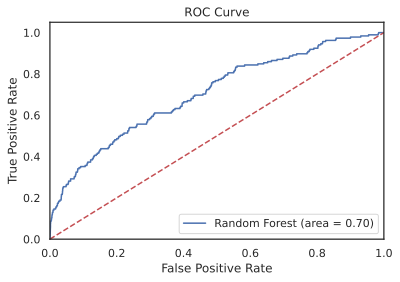

In [ ]:
rforest_roc_auc = roc_auc_score(y_test, RF_model.predict_proba(X_test_pca)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rforest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('rforest_ROC')
plt.show()

### Logistic Regression

Accuracy Score is 0.60048
[[6464 4289]
 [  81  104]]
F1: 0.045435
0.6134833522260287
[[0.60113457 0.39886543]
 [0.43783784 0.56216216]]


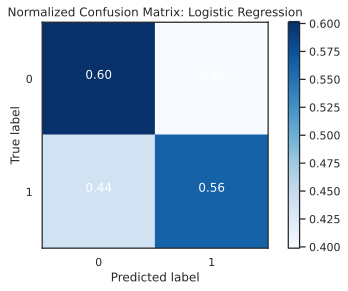

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
LR_model.fit(X_train_smote, y_train_smote)
y_predict = LR_model.predict(X_test_pca)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(confusion_matrix(y_test, y_predict))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print(roc_auc_score(y_test, LR_model.predict_proba(X_test_pca)[:, 1]))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

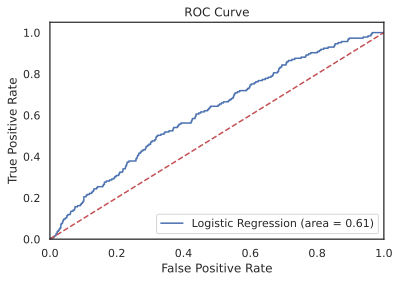

In [ ]:
logit_roc_auc = roc_auc_score(y_test, LR_model.predict_proba(X_test_pca)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, LR_model.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SVM

0.6165934836538389
Accuracy Score is 0.5554
[[5964 4789]
 [  74  111]]
F1: 0.043658
[[0.55463592 0.44536408]
 [0.4        0.6       ]]


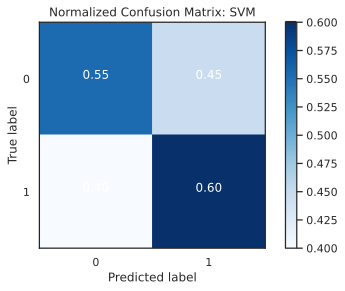

In [ ]:
SVM_model = svm.SVC (C=0.8,
                     kernel='linear',
                     class_weight='balanced',
                     probability=True)
SVM_model.fit(X_train_smote, y_train_smote)
y_predict = SVM_model.predict(X_test_pca)

print(roc_auc_score(y_test, SVM_model.predict_proba(X_test_pca)[:, 1]))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(confusion_matrix(y_test, y_predict))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

### LGBM

Accuracy Score is 0.96178
       0    1
0  10478  275
1    143   42
F1: 0.16733
roc-auc score:  0.6930166565710135
[[0.97442574 0.02557426]
 [0.77297297 0.22702703]]


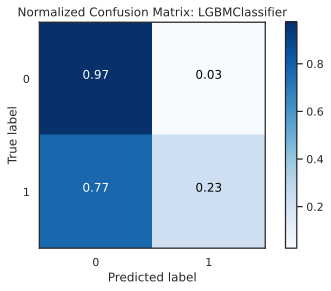

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import itertools
params={
         'max_depth':34,
         'n_estimators':3250,
         'scale_pos_weight':60,
         'seed':42
       }

lgbm = LGBMClassifier(**params)

lgbm.fit(X_train_smote, y_train_smote)
y_predict = lgbm.predict(X_test_pca)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print('roc-auc score: ', roc_auc_score(y_test, lgbm.predict_proba(X_test_pca)[:, 1]))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: LGBMClassifier')

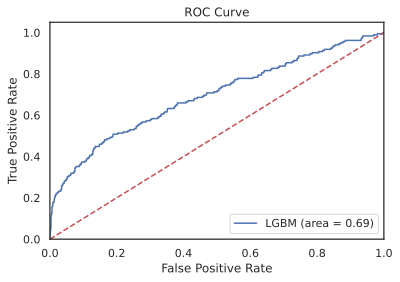

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lgbm_roc_auc = roc_auc_score(y_test, lgbm.predict_proba(X_test_pca)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lgbm.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('lgbm_ROC')
plt.show()

### XGBoost

Accuracy Score is 0.95813
       0    1
0  10430  323
1    135   50
F1: 0.17921
roc-auc score:  0.702983454020374
[[0.96996187 0.03003813]
 [0.72972973 0.27027027]]


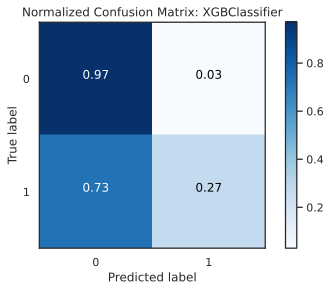

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=8,
                      n_estimators=2000,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

xgb.fit(X_train_smote, y_train_smote)
y_predict = xgb.predict(X_test_pca)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))
print('F1: {:.5}'.format(f1_score(y_test, y_predict)))
print('roc-auc score: ', roc_auc_score(y_test, xgb.predict_proba(X_test_pca)[:, 1]))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: XGBClassifier')

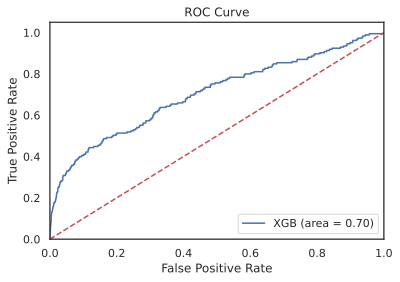

In [ ]:
xgb_roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test_pca)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('xgb_ROC')
plt.show()

## Bucketing Attempts

### Bucketing AGE

In [ ]:
labels = ["lowest","low","medium","high","highest"]
localdf = pd.cut(df['AGE'], bins = 5, labels = labels)
localdf = pd.DataFrame(localdf)
name = 'gp' + '_' + 'AGE'
localdf[name] = localdf['AGE']
df = df.join(localdf[name])
df[name] = df[name].astype(object)
df = df.drop('AGE',axis=1)

### Bucketing AMT_INCOME_TOTAL

In [ ]:
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].astype(float)
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL']/10000

labels = ["low","medium", "high"]
localdf = pd.qcut(df['AMT_INCOME_TOTAL'], q=3,labels = labels)
localdf = pd.DataFrame(localdf)
name = 'gp' + '_' + 'AMT_INCOME_TOTAL'
localdf[name] = localdf['AMT_INCOME_TOTAL']
df = df.join(localdf[name])
df[name] = df[name].astype(object)
df.drop('AMT_INCOME_TOTAL',axis=1,inplace=True)

### Bucketing YEARS_EMPLOYED


In [ ]:
labels = ["lowest","low","medium","high","highest"]
localdf = pd.cut(df['YEARS_EMPLOYED'], bins = 5, labels = labels)

localdf = pd.DataFrame(localdf)
name = 'gp'+'_'+'YEARS_EMPLOYED'
localdf[name]=localdf['YEARS_EMPLOYED']
df = df.join(localdf[name])
df[name]=df[name].astype(object)

All bucketing methods have failed.